In [171]:
# Import dependencies
import pandas as pd
from random import uniform
from citipy import citipy
from config import api_key
import requests
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import linregress


In [132]:
# Generate 1500 random lat/lng coordinates to ensure there are at least 500 unique values
# Use citipy to find the closest cities to those coordinates

df = pd.DataFrame()

df['lat'] = [random.uniform(-90, 90) for x in range(1500)]
df['lng'] = [random.uniform(-180, 180) for x in range (1500)]
    
for index, row in df.iterrows():
    lat = row['lat']
    lng = row['lng']
    df.set_value(index, 'city', citipy.nearest_city(lat, lng).city_name)
    df.set_value(index, 'country', citipy.nearest_city(lat, lng).country_code)

# Ensure no duplicates and reset index
df = df.drop_duplicates(['city', 'country'])
df = df.reset_index()       

# Get the first 500 unique values
df = df.iloc[:500]


C:\Users\Keaton\Anaconda3.0\envs\DUData\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':
C:\Users\Keaton\Anaconda3.0\envs\DUData\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


,index,lat,lng,city,country
0,0,6.275321,-117.464170,san patricio,mx
1,1,-15.476659,-165.247211,alofi,nu
2,2,79.197667,9.923646,barentsburg,sj
3,3,-80.334241,-83.362865,ushuaia,ar
4,4,61.502872,94.802000,baykit,ru
...,...,...,...,...,...
495,1118,-25.416747,143.757709,emerald,au
496,1120,24.775167,-97.872586,san fernando,mx
497,1122,6.181846,13.464695,betare oya,cm
498,1135,67.689606,19.983554,kiruna,se


In [160]:
# Make API calls to OpenWeather API to return temperature, humidity, cloudiness, and windspeed, and add to dataframe

# Set base URL
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

# Create counter to keep track of rows
counter = 0
setCount = 1

print('Beginning Data Retrieval')
print('------------------------')

for index, row in df.iterrows():
    city = row['city']
    country = row['country']
    counter += 1
    query_url = base_url + city + ',' + country + '&appid=' + api_key
    response = requests.get(query_url).json()
   
    try:
        print(f'Processing Record {counter} of Set {setCount} | {city}, {country}')
                      
        df.loc[index, 'max_temp'] = response['main']['temp_max']
        df.loc[index, 'humidity'] = response['main']['humidity']
        df.loc[index, 'cloudiness'] = response['clouds']['all']
        df.loc[index, 'windspeed'] = response['wind']['speed']
    
    except (KeyError, IndexError):
        print('City not found. Skipping.')
              
    if counter == 49:
        setCount += 1
        counter = 0

print('------------------------')
print('Data Retrieval Complete')



Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | san patricio, mx
Processing Record 2 of Set 1 | alofi, nu
Processing Record 3 of Set 1 | barentsburg, sj
City not found. Skipping.
Processing Record 4 of Set 1 | ushuaia, ar
Processing Record 5 of Set 1 | baykit, ru
Processing Record 6 of Set 1 | castro, cl
Processing Record 7 of Set 1 | kalmunai, lk
Processing Record 8 of Set 1 | punta arenas, cl
Processing Record 9 of Set 1 | mezen, ru
Processing Record 10 of Set 1 | rikitea, pf
Processing Record 11 of Set 1 | carutapera, br
Processing Record 12 of Set 1 | kidal, ml
Processing Record 13 of Set 1 | lagoa, pt
Processing Record 14 of Set 1 | faanui, pf
Processing Record 15 of Set 1 | mataura, pf
City not found. Skipping.
Processing Record 16 of Set 1 | richards bay, za
Processing Record 17 of Set 1 | broome, au
Processing Record 18 of Set 1 | kodiak, us
Processing Record 19 of Set 1 | guerrero negro, mx
Processing Record 20 of Set 1 | vardo, no
Processing R

Processing Record 22 of Set 4 | antofagasta, cl
Processing Record 23 of Set 4 | bambous virieux, mu
Processing Record 24 of Set 4 | broken hill, au
Processing Record 25 of Set 4 | bilibino, ru
Processing Record 26 of Set 4 | lima, pe
Processing Record 27 of Set 4 | tessalit, ml
Processing Record 28 of Set 4 | lompoc, us
Processing Record 29 of Set 4 | rovinj, hr
Processing Record 30 of Set 4 | dryden, ca
Processing Record 31 of Set 4 | vani, ge
Processing Record 32 of Set 4 | bellevue, us
Processing Record 33 of Set 4 | mount isa, au
Processing Record 34 of Set 4 | presidencia roque saenz pena, ar
Processing Record 35 of Set 4 | avarua, ck
Processing Record 36 of Set 4 | port-gentil, ga
Processing Record 37 of Set 4 | fomboni, km
Processing Record 38 of Set 4 | riviere-au-renard, ca
Processing Record 39 of Set 4 | fairbanks, us
Processing Record 40 of Set 4 | sorong, id
Processing Record 41 of Set 4 | khatanga, ru
Processing Record 42 of Set 4 | takoradi, gh
Processing Record 43 of Set

Processing Record 46 of Set 7 | acapulco, mx
Processing Record 47 of Set 7 | atbasar, kz
Processing Record 48 of Set 7 | opoczno, pl
Processing Record 49 of Set 7 | tomatlan, mx
Processing Record 1 of Set 8 | gorno-chuyskiy, ru
City not found. Skipping.
Processing Record 2 of Set 8 | oskarshamn, se
Processing Record 3 of Set 8 | grindavik, is
Processing Record 4 of Set 8 | hambantota, lk
Processing Record 5 of Set 8 | maloshuyka, ru
City not found. Skipping.
Processing Record 6 of Set 8 | ballina, au
Processing Record 7 of Set 8 | thinadhoo, mv
Processing Record 8 of Set 8 | marshall, us
Processing Record 9 of Set 8 | wexford, ie
Processing Record 10 of Set 8 | aklavik, ca
Processing Record 11 of Set 8 | klaksvik, fo
Processing Record 12 of Set 8 | umm durman, sd
City not found. Skipping.
Processing Record 13 of Set 8 | hirara, jp
Processing Record 14 of Set 8 | sao jose da coroa grande, br
Processing Record 15 of Set 8 | mehamn, no
Processing Record 16 of Set 8 | filimonovo, ru
Proces

In [168]:
# Drop empty dataframe rows
df = df.dropna()

# Export to csv
df.to_csv('WeatherData.csv', index=False, header=True)

# Display dataframe
df.head()

,index,lat,lng,city,country,temp,humidity,cloudiness,windspeed,max_temp
0,0,6.275321,-117.464170,san patricio,mx,84.2,66,40,11.41,84.2
1,1,-15.476659,-165.247211,alofi,nu,84.2,79,50,6.93,84.2
3,3,-80.334241,-83.362865,ushuaia,ar,50.0,71,75,18.34,50.0
4,4,61.502872,94.802000,baykit,ru,-2.7,99,83,2.95,-2.7
5,5,-42.611450,-79.412777,castro,cl,64.4,63,20,5.82,64.4


This graph shows the visualization of temperature being highest near the equator, and falling as you go further away (in either direction).


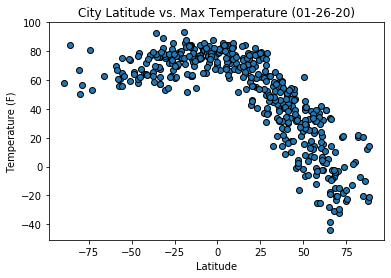

In [196]:
# Latitude vs. Temperature Plot
plt.scatter(df['lat'], df['temp'], edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')

today = datetime.today().strftime('%m-%d-%y')

plt.title(f'City Latitude vs. Max Temperature ({today})')

# Save plot as png
plt.savefig('Output/City Latitude vs. Max Temperature.png')

print('This graph shows the visualization of temperature being highest near the equator, and falling as you go further away (in either direction).')


There is not a visible relationship in this graph, but it does show the bulk of cities analyzed have humidities greater than 60%.


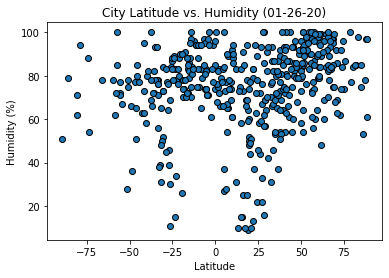

In [200]:
# Latitude vs. Humidity Plot
plt.scatter(df['lat'], df['humidity'], edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({today})')
          
plt.savefig('Output/City Latitude vs. Humidity.png')

print('There is not a visible relationship in this graph, but it does show the bulk of cities analyzed have humidities greater than 60%.')

This graph suggests that the cloudiness variable might be more subjective than the other variables, as groups in 10% increments are apparent.


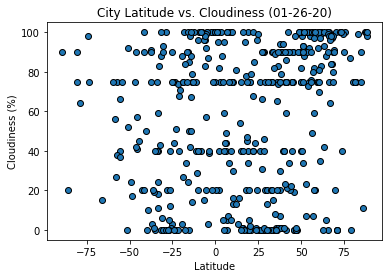

In [201]:
# Latitude vs. Cloudiness Plot
plt.scatter(df['lat'], df['cloudiness'], edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({today})')
          
plt.savefig('Output/City Latitude vs. Cloudiness.png')

print('This graph suggests that the cloudiness variable might be more subjective than the other variables, as groups in 10% increments are apparent.')

This graph shows the bulk of cities analyzed have wind speeds around 10mph or less.


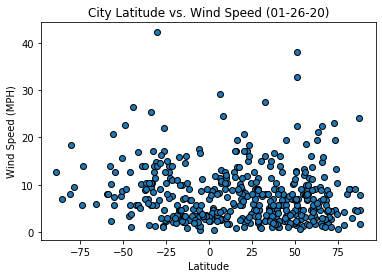

In [202]:
# Latitude vs. Wind Speed Plot
plt.scatter(df['lat'], df['windspeed'], edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title(f'City Latitude vs. Wind Speed ({today})')
          
plt.savefig('Output/City Latitude vs. Wind Speed.png')

print('This graph shows the bulk of cities analyzed have wind speeds around 10mph or less.')

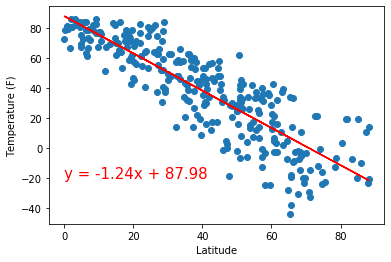

The r-squared value is -0.8626488579801967.
With an r-squared value of -0.8626488579801967, this graph shows a strong, negative relationship between max temp and latitude in the Northern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [205]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
northDF = df[df['lat'] > 0]

x_values = northDF['lat']
y_values = northDF['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

print(f'The r-squared value is {rvalue}.')

print(f'With an r-squared value of {rvalue}, this graph shows a strong, negative relationship between max temp and latitude in the Northern Hemisphere.')

plt.savefig('Output/Latitude vs Max Temp in the Northern Hemisphere.png')

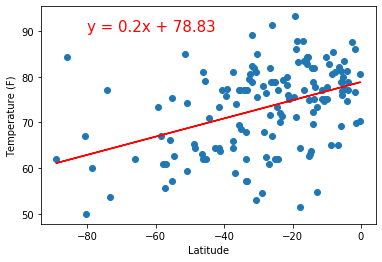

The r-squared value is 0.4202945076853123.
This graph shows a less strong relationship between latitude and max temperature in the Southern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [207]:
# Southern Hemisphere - Temperature (F) vs. Latitude
southDF = df[df['lat'] < 0]

x_values = southDF['lat']
y_values = southDF['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,90),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.show()

print(f'The r-squared value is {rvalue}.')

print(f'This graph shows a less strong relationship between latitude and max temperature in the Southern Hemisphere.')

plt.savefig('Output/Latitude vs Max Temp in the Southern Hemisphere.png')

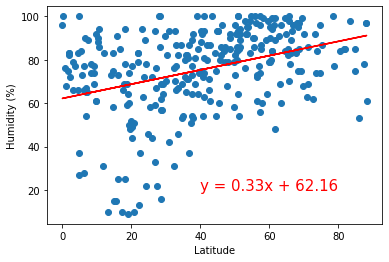

The r-squared value is 0.3657496779821694.
This graph shows there is a weak, positive relationship between latitude and humidity in the Northern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [208]:
# Northern Hemisphere - Humidity (%) vs. Latitude
x_values = northDF['lat']
y_values = northDF['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

print(f'The r-squared value is {rvalue}.')

print(f'This graph shows there is a weak, positive relationship between latitude and humidity in the Northern Hemisphere.')

plt.savefig('Output/Latitude vs Humidity in the Northern Hemisphere.png')

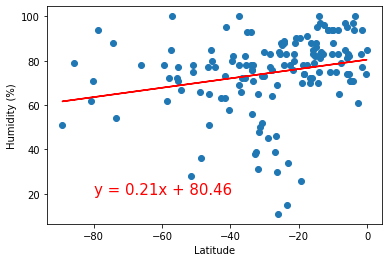

The r-squared value is 0.23575695326010404.
This graph shows there is an even weaker, positive relationship between latitude and humidity in the Southern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [209]:
# Southern Hemisphere - Humidity (%) vs. Latitude
x_values = southDF['lat']
y_values = southDF['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-80,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

print(f'The r-squared value is {rvalue}.')

print(f'This graph shows there is an even weaker, positive relationship between latitude and humidity in the Southern Hemisphere.')


plt.savefig('Output/Latitude vs Humidity in the Southern Hemisphere.png')

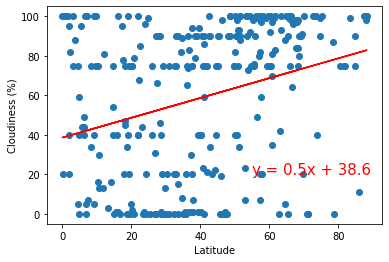

The r-squared value is 0.29392089247567654.
This graph shows a weak, positive relationship between latitude and cloudiness in the Northern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [210]:
# North Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northDF['lat']
y_values = northDF['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

print(f'The r-squared value is {rvalue}.')

print(f'This graph shows a weak, positive relationship between latitude and cloudiness in the Northern Hemisphere.')

plt.savefig('Output/Latitude vs Cloudiness in the Northern Hemisphere.png')

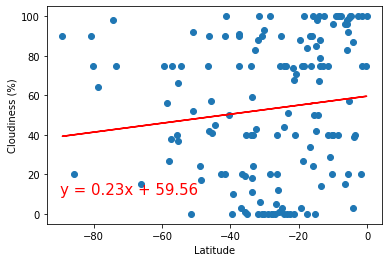

The r-squared value is 0.1252754140653845.
This graph shows a weak, positive relationship between latitude and cloudiness in the Southern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [211]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southDF['lat']
y_values = southDF['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-90,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

print(f'The r-squared value is {rvalue}.')

print(f'This graph shows a weak, positive relationship between latitude and cloudiness in the Southern Hemisphere.')

plt.savefig('Output/Latitude vs Cloudiness in the Southern Hemisphere.png')

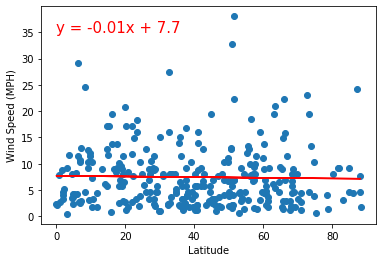

The r-squared value is -0.024146497190915064.
This graph shows there is a very weak relationship between latitude and wind speed in the Northern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [212]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = northDF['lat']
y_values = northDF['windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()

print(f'The r-squared value is {rvalue}.')

print(f'This graph shows there is a very weak relationship between latitude and wind speed in the Northern Hemisphere.')

plt.savefig('Output/Latitude vs Wind Speed in the Northern Hemisphere.png')

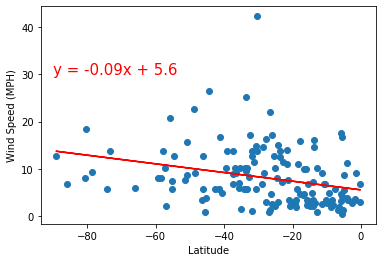

The r-squared value is -0.29129576039934235.
This graph shows there is a slightly stronger, negative relationship between latitude and wind speed in the Southern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [213]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southDF['lat']
y_values = southDF['windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-90,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()

print(f'The r-squared value is {rvalue}.')

print(f'This graph shows there is a slightly stronger, negative relationship between latitude and wind speed in the Southern Hemisphere.')

plt.savefig('Output/Latitude vs Wind Speed in the Southern Hemisphere.png')